In [1]:
import sys
import os
import h5py
import warnings
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import scipy.signal
import seaborn as sns
from scipy.stats import genextreme as gev, kstest
# from pyextremes import get_extremes, get_return_periods, EVA
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

sns.set(style='ticks', font_scale=1.25)

In [2]:
workdir = '../examples/test/outputs'

In [3]:
out_da = pd.read_csv(os.path.join(workdir, '01981da'), delim_whitespace=True)
out_ds = pd.read_csv(os.path.join(workdir, '01981ds'), delim_whitespace=True)

-1.509967

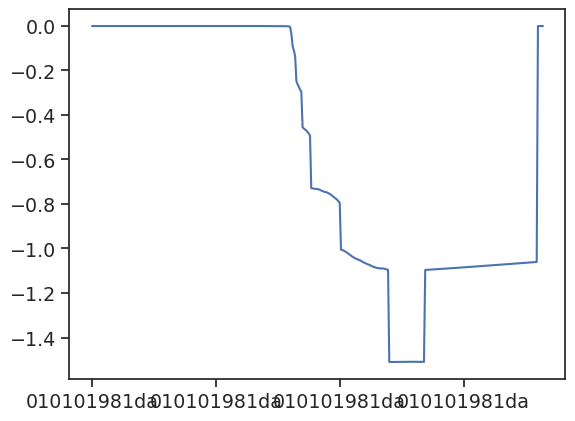

In [4]:
out_da['ACTV_LYR'][out_da['ACTV_LYR']<-8888] = np.nan
out_da['ACTV_LYR'].plot()
out_da['ACTV_LYR'].min()

<AxesSubplot:>

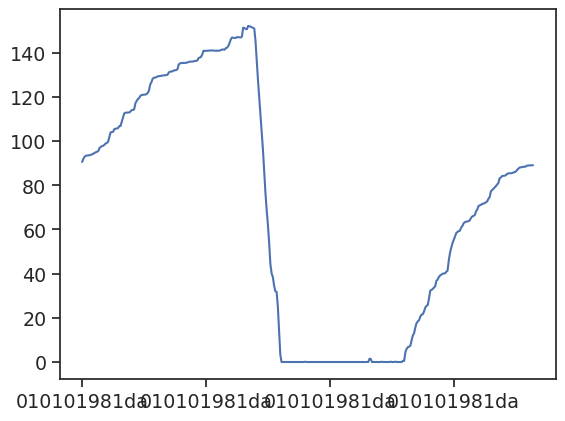

In [5]:
out_da['SNOWPACK'].plot()

In [6]:
out_ds.columns

Index(['DOY', 'DATE', 'HOUR', 'SOL_RADN', 'AIR_TEMP', 'HUM', 'WIND', 'PREC',
       'SOIL_RN', 'SOIL_LE', 'SOIL_H', 'SOIL_G', 'ECO_RN', 'ECO_LE', 'ECO_H',
       'ECO_G', 'TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6',
       'TEMP_7', 'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12',
       'TEMP_13', 'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18',
       'TEMP_19', 'TEMP_20', 'TEMP_LITTER', 'TEMP_SNOW'],
      dtype='object')

-0.0009460449

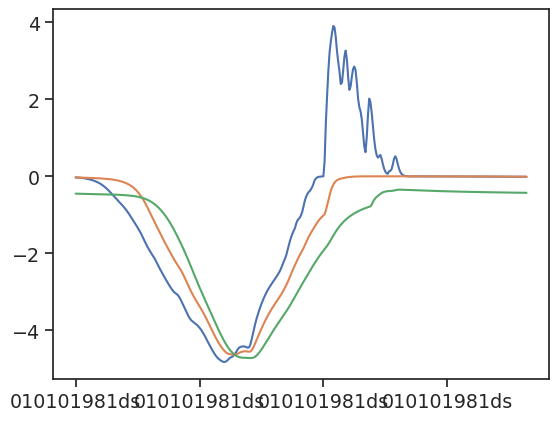

In [8]:
out_ds['TEMP_6'].plot()
out_ds['TEMP_7'].plot()
out_ds['TEMP_8'].plot()

out_ds['TEMP_7'].max()

<AxesSubplot:>

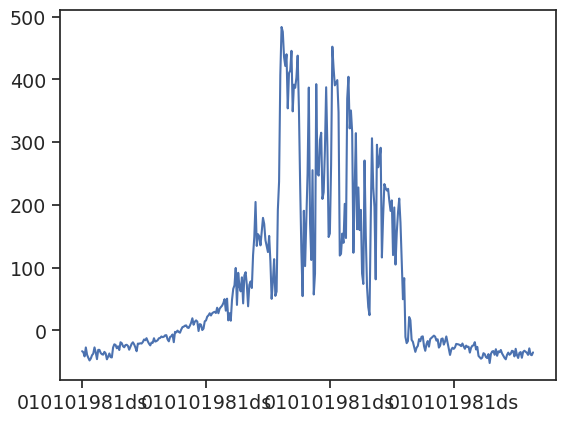

In [10]:
out_ds['ECO_RN'].plot()